# **EE-613: Machine Learning for Engineers**
 
**SVM Lab**<br>
Dr. Jean-Marc Odobez and Dr. Michael Villamizar<br>
Idiap Research Institute<br>
2019


# Part 2: Support Vector Machines

The goal of this lab session is to experiment with Support Vector Machines (SVM) for binary classification, and in particular to understand the role of the hyperparameters.


This notebook consists of four exercises with questions that you can complete and answer. Insert the solution and answers in the student report file (./report.doc). 

In [1]:
# Import libraries.
import sys
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Own libraries.
sys.path.append('../lib/')
import utils as utils
import test_exercises as tests

## **2. SVM with RBF Kernel**


### **2.1 Two-dimensional data**

In this section, the goal is to apply an SVM classifier with RBF kernel to two-dimensional data points.

Run the next cell to load and show the 2D dataset. We see that the dataset is not linearly separable.


In [2]:
# Parameters.
path = 'data/ex2Data/ex2a.txt'  # Dataset file.

# Load the 2D dataset. This function returns a Nx2 array (X) 
# with the 2D data (x1, x2) for all samples, and a N vector (y)
# containing the class labels {-1, +1} for all samples.
X, y = utils.load_2d_dataset(path)

# Messages.
print ('2D Dataset:')
print ('+ Num. samples: {0}'.format(X.shape[0]))
print ('+ Data format:', X.shape)
print ('+ Labels format:', y.shape)

2D Dataset:
+ Num. samples: 863
+ Data format: (863, 2)
+ Labels format: (863,)


Run the next cell to visualize the dataset containing 2D points belonging to two classes.

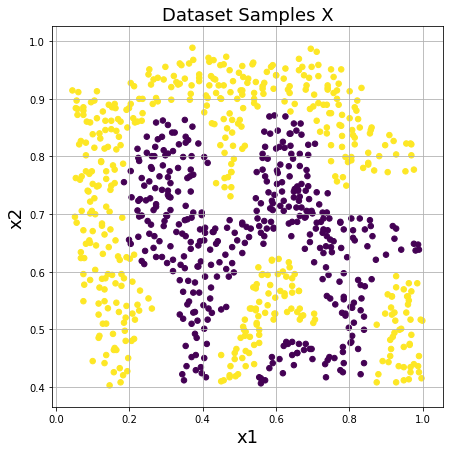

In [3]:
# Show 2D dataset samples.
def show_2d_dataset(X, y, title='Dataset samples'):
    """This function shows the dataset samples. """
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    ax.scatter(X[:,0],X[:,1],c=y, s=30)
    plt.xlabel('x1', fontsize=18)
    plt.ylabel('x2', fontsize=18)
    plt.title(title, fontsize=18)
    plt.grid(True)
    return ax
    
# Show 2D dataset samples (points).
show_2d_dataset(X, y, 'Dataset Samples X');

<font color="blue" size="+1">**Exercise 1: SVM with RBF kernel**</font>

Complete the next function to learn an [SVM classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) using RBF kernel. Insert the implemented function (*TODO* block only) in the <span style="color:red">**student report**</span> file.

In [6]:
# SVM with RBF kernel.
def rbf_svm(X, y, C=1.0, gamma=1.0):
    """ This function learns an SVM with RBF kernel to perform 
        binary classification on the input dataset (X,y). 
        
    Input:
        + X (Numpy ndarray): Nx2 array with the dataset samples
            (2D points), being N the number of samples.
        + y (Numpy ndarray): N vector with the class labels {-1,+1}.
        + C (float): Cost parameter (Default: C=1.0).
        + gamma (float): Kernel gamma parameter (Default: 1.0).
    Output:
        + svm (class): Trained SVM classifier with RBF kernel.
    """

    #=====================================================
    # TODO: Complete the next lines to create and train an 
    # SVM using an RBF kernel with input C and gamma values.
    svm = SVC(kernel = 'rbf', C=C, gamma=gamma)
    svm.fit(X,y)
    #=====================================================
    
    return svm

#### **Test your exercise**
Run the next cell to test your exercise  


In [7]:
# Check implementation.
tests.test_rbf_svm(rbf_svm)

Checking implementation
>> Running test 1 ...  ok
>> Running test 2 ...  ok
The exercise is correct. Well done !!!


The following function computes the class predictions using the trained SVM classifier.

In [9]:
# Class predictions.
def prediction(svm, X):
    """ This function computes the class predictions using 
        the trained SVM on the input samples (X). 
        
    Input:
        + X (Numpy ndarray): Nx2 array with the dataset samples
            (2D points), being N the number of samples.
        + svm (class): Trained SVM classifier.
    Output:
        + yp (Numpy ndarray): N vector with the class predictions
            {+1, -1} given by the SVM classifier.
    """
    
    # Class predictions.
    yp = svm.predict(X)
    
    return yp

The function in the next cell computes the classification accuracy between the true class labels ($y$) and the predicted class labels given by the classifier ($yp$).

In [10]:
# Classification accuracy.
def accuracy(y, yp):
    acc = np.sum(y==yp)/len(y)
    return acc

Run the next cell to learn the SVM with RBF kernel for the 2D dataset. Set the parameter values to $C=1$ and $\gamma=100$. Remember $\gamma = \frac{1}{2\sigma^2}$.


In [11]:
# Parameters.
C = 1.0  # Cost parameter.
gamma = 100  # RBF gamma parameter.

# SVM classifier.
svm = rbf_svm(X, y, C, gamma)

# Class predictions.
yp = prediction(svm, X)

# Classification accuracy.
acc = accuracy(y, yp)

# Message.
print('Classification accuracy: {0:.3f}'.format(acc))

Classification accuracy: 0.998


The next function plots the decision boundary and the support vectors (denoted by red). This is done by defining a grid over the feature space and running the trained SVM classifier for each grid location $(u,v)$ to get the classification score $Z(u,v)$. The function uses the SVC function: [decision_function](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to obtain the score for a test sample. Visualize the contours of the classification map $Z$ and the decision boundary (zero-countour). 

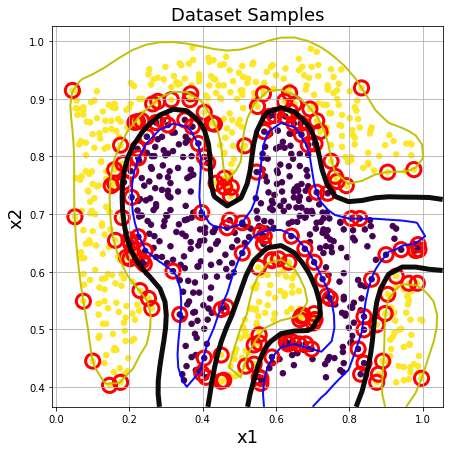

In [12]:
# Show decision boundary.
def decision_boundary(svm, ax):
    
    # Parameters.
    widths = [2, 5, 2]  # Contour -line- widths.
    levels = [-1.0, 0.0, 1.0]  # Contour levels.
    colors = ['b', 'k', 'y']  # Contour colors.

    # SVM attributes.
    s = svm.support_vectors_  # Support vectors.
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid over the feature space.
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    # Test the SVM for every grid location.
    Z = svm.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins.
    ax.contour(X, Y, Z, colors=colors, levels=levels, \
               alpha=0.95, linewidths=widths)

    # Plot support vectors.
    ax.scatter(s[:, 0], s[:, 1], s=200, lw=3, \
               facecolors='none', edgecolors='r');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
# Show dataset samples.
ax = show_2d_dataset(X, y, 'Dataset Samples')

# Shown linear model.
decision_boundary(svm, ax)   

### **2.2 Hyperparameter C**

In this section, the goal is to visualize the effect of hyperparameters $C$ and $\gamma$ of the SVM with RBF kernel on another two-dimensional dataset.

<font color="blue" size="+1">**Exercise 2: Load 2D dataset**</font>

Run the next cell to load and show the 2D dataset. 

**Q1**: Do you think the classes are easily separable?

Insert the answer to the question in the <span style="color:red">**student report**</span> file.

2D Dataset:
+ Num. samples: 211
+ Data format: (211, 2)
+ Labels format: (211,)


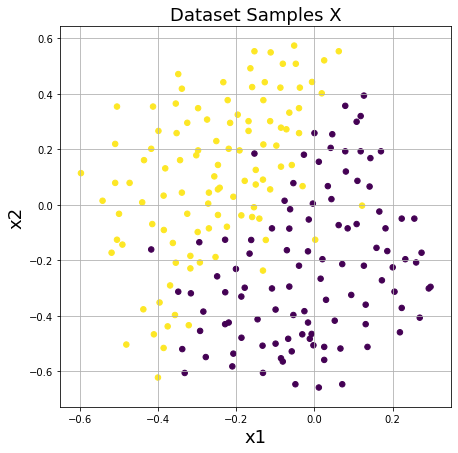

In [13]:
# Parameters.
path = 'data/ex2Data/ex2b.txt'  # Dataset file.

# Load the 2D dataset. This function returns a Nx2 array (X) 
# with the 2D samples, and a N vector (y) containing the 
# class labels {-1, +1} for all samples.
X, y = utils.load_2d_dataset(path)

# Messages.
print ('2D Dataset:')
print ('+ Num. samples: {0}'.format(X.shape[0]))
print ('+ Data format:', X.shape)
print ('+ Labels format:', y.shape)

# Show 2D dataset samples (points).
show_2d_dataset(X, y, 'Dataset Samples X');

<font color="blue" size="+1">**Exercise 3: Hyperparameter values**</font>

Try with $C=1,1000$ and $\gamma=1,10,100,1000$. Visualize the learned models with different combinations of hyperparameter values. 

**Q2**: Have a look as ell at the number of support vectors in the different configurations. Comment on your observation in the <span style="color:red">**student report**</span> file.

Classification accuracy: 0.943


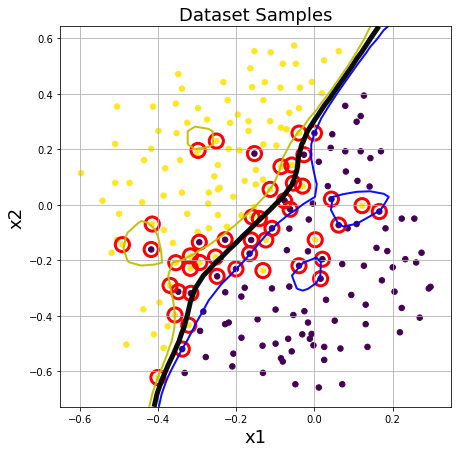

In [28]:
# Parameters.
C = 1000  # Cost parameter.
gamma = 10  # RBF parameter.

# Create and train an SVM classifier
# with RBF kernel.
svm = rbf_svm(X, y, C, gamma)

# Class predictions.
yp = prediction(svm, X)

# Classification accuracy.
acc = accuracy(y, yp)

# Message.
print('Classification accuracy: {0:.3f}'.format(acc))

# Show dataset samples.
ax = show_2d_dataset(X, y, 'Dataset Samples')

# Shown linear model.
decision_boundary(svm, ax)

<font color="blue" size="+1">**Exercise 4: Cross-validation**</font>

In this exercise, the goal is to perform cross-validation to find the best hyperparameters ($C$ and $\gamma$). The next cell loads the previous 2D dataset which was split into three subsets for cross-validation. Then, a search grid is implemented to find the hyperparameters that achieve the best classification accuracy (on test data).

In [29]:
# Load the 2D dataset. This dataset has three subsets used
# to perform cross-validation. Each subset is a Nx2 array (X) 
# with the 2D data (x1, x2) and a N vector (y) with the class 
# labels {-1, +1} for the samples in such subset.
X_sets, y_sets = utils.load_partitioned_dataset()

# Messages.
print ('2D Dataset:')
print ('+ Num. sets: {}'.format(len(X_sets)))
for k in range(len(X_sets)):
    print ('+  Set {0} - Num. samples: {1}'.format(k, X_sets[k].shape[0]))
print ('+ Data format:', X_sets[0].shape)
print ('+ Labels format:', y_sets[0].shape)

2D Dataset:
+ Num. sets: 3
+  Set 0 - Num. samples: 70
+  Set 1 - Num. samples: 70
+  Set 2 - Num. samples: 71
+ Data format: (70, 2)
+ Labels format: (70,)


The next code plots the data points for subset 1.

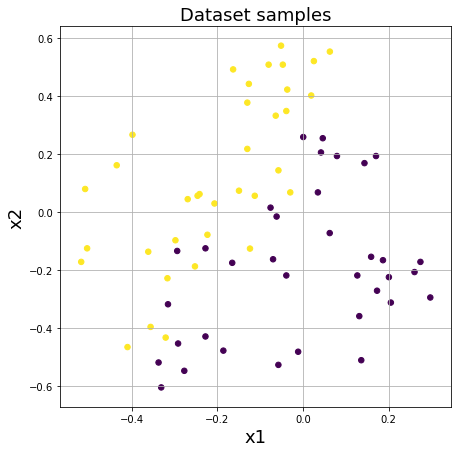

In [30]:
show_2d_dataset(X_sets[1], y_sets[1]);

**Question**: Run the next cell to search for the best hyperparameters. Explain in a few words the process of 3-fold cross-validation that is applied on this example. Report the best set of parameters ($C$ and $\gamma$) that has been returned by the grid search. Visualize again the model in exercise 2 learned with these parameters. What can you conclude. Insert your comments on in the <span style="color:red">student report</span> file.

In [32]:
# Parameters.
C = np.arange(1, 100, 5)  # Cost parameter values.
gamma = np.arange(1, 100, 5)  # Gamma parameter values.

# Variables.
max_acc = 0  # Max. classification accuracy.
best_C, best_gamma = 0, 0  # Best hyperparameters.

# Parameters grid.
for c in C:
    for g in gamma:
        # Accuracies.
        accs = []
        # K-folds (3 folds).
        for k in range(3):
            # Subset indexes.
            indxs = [0,1,2]
            t = indxs.pop(k) # Test index.
            # Test data -current set k-.
            X_test = X_sets[t]
            y_test = y_sets[t]
            # Train data -resting subsets-
            X_train = np.concatenate([X_sets[indxs[0]], X_sets[indxs[1]]])
            y_train = np.concatenate([y_sets[indxs[0]], y_sets[indxs[1]]])
            # SVM classifier with RBF kernel.
            svm = rbf_svm(X_train, y_train, c, g)
            # Class predictions.
            yp = prediction(svm, X_test)
            # Classification accuracy.
            accs.append(accuracy(y_test, yp))
        # Mean accuracy.
        acc = np.mean(accs)
        if acc > max_acc:
            max_acc = acc
            best_C, best_gamma = c, g
# Results.
print ('Classification Results:')
print ('+ Max. accuracy: {0:.3f}'.format(max_acc))
print ('+ Best C parameter: {0:.1f}'.format(best_C))
print ('+ Best gamma parameter: {0:.1f}'.format(best_gamma))

Classification Results:
+ Max. accuracy: 0.929
+ Best C parameter: 26.0
+ Best gamma parameter: 6.0
